In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EarthQuake_data_with_prep.csv')
df

,date,latitude,longitude,depth,magnitude,nst,gap,dmin
0,2023-10-20T23:00:21.109Z,14.3667,-93.4221,10.000,4.9,100.000000,91.000000,2.272000
1,2023-10-20T21:21:24.042Z,-19.1188,-173.3136,10.000,4.5,19.000000,173.000000,2.705000
2,2023-10-20T19:51:55.439Z,0.7788,125.2063,51.393,5.2,194.000000,44.000000,2.160000
3,2023-10-20T19:34:02.111Z,-5.4912,150.2567,124.504,4.9,42.000000,82.000000,2.298000
4,2023-10-20T19:16:09.952Z,30.9618,141.4852,35.000,4.5,33.000000,128.000000,2.574000
...,...,...,...,...,...,...,...,...
102459,2019-12-31T18:37:24+0000,50.4878,-121.0354,14.000,1.8,72.975387,91.136861,4.381118
102460,2019-12-31T22:18:53+0000,48.2504,-78.4490,0.000,2.4,72.975387,91.136861,4.381118
102461,2019-12-31T23:11:07+0000,50.5262,-121.0061,10.450,2.0,72.975387,91.136861,4.381118
102462,2019-12-31T23:53:23+0000,45.0834,-74.7183,18.000,1.9,72.975387,91.136861,4.381118


In [4]:
X = df[['latitude', 'longitude','depth','nst','gap','dmin']]
y = df[['magnitude']]

In [5]:
X

,latitude,longitude,depth,nst,gap,dmin
0,14.3667,-93.4221,10.000,100.000000,91.000000,2.272000
1,-19.1188,-173.3136,10.000,19.000000,173.000000,2.705000
2,0.7788,125.2063,51.393,194.000000,44.000000,2.160000
3,-5.4912,150.2567,124.504,42.000000,82.000000,2.298000
4,30.9618,141.4852,35.000,33.000000,128.000000,2.574000
...,...,...,...,...,...,...
102459,50.4878,-121.0354,14.000,72.975387,91.136861,4.381118
102460,48.2504,-78.4490,0.000,72.975387,91.136861,4.381118
102461,50.5262,-121.0061,10.450,72.975387,91.136861,4.381118
102462,45.0834,-74.7183,18.000,72.975387,91.136861,4.381118


In [6]:
y

,magnitude
0,4.9
1,4.5
2,5.2
3,4.9
4,4.5
...,...
102459,1.8
102460,2.4
102461,2.0
102462,1.9


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.53694274, 0.24053951, 0.01928803, 0.2238806 , 0.32644628,
        0.05538104],
       [0.31280159, 0.01855017, 0.01928803, 0.02238806, 0.66528926,
        0.06605651],
       [0.44598972, 0.8480281 , 0.08265226, 0.45771144, 0.1322314 ,
        0.05261972],
       ...,
       [0.77898279, 0.16389363, 0.01997688, 0.15665519, 0.32701182,
        0.10738065],
       [0.74255044, 0.29251055, 0.03153439, 0.15665519, 0.32701182,
        0.10738065],
       [0.75867216, 0.30447508, 0.00978179, 0.15665519, 0.32701182,
        0.10738065]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(81971, 6) (20493, 6) (81971, 1) (20493, 6)


### Use RandomForest Regression to Prediction

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

<ipython-input-10-0e2b706809eb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [11]:
y_rf_pred = rf.predict(X_test)
y_rf_pred

array([1.891, 3.102, 0.825, ..., 2.65 , 1.781, 2.004])

In [16]:
y_test

,magnitude
98332,1.9
28816,3.6
81936,0.9
97162,3.5
13053,2.0
...,...
96090,2.1
93406,2.5
62960,2.0
4380,2.6


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")

Mean Absolute Error: 0.46147622857883164
Mean Squared Error: 0.39239476546977825
Root Mean Squared Error: 0.6264142123785014
R-squared: 0.5829018974363672


### Use KNeighbors Regression to Prediction

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [15]:
y_knn_pred = knn.predict(X_test)
y_knn_pred

array([[2.156],
       [3.076],
       [0.872],
       ...,
       [2.612],
       [1.36 ],
       [2.256]])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_rmse = knn_mse ** 0.5
knn_r2 = r2_score(y_test, y_knn_pred)

print(f"Mean Absolute Error: {knn_mae}")
print(f"Mean Squared Error: {knn_mse}")
print(f"Root Mean Squared Error: {knn_rmse}")
print(f"R-squared: {knn_r2}")

Mean Absolute Error: 0.45036392903332845
Mean Squared Error: 0.37289853355906516
Root Mean Squared Error: 0.610654184918981
R-squared: 0.603625520819476


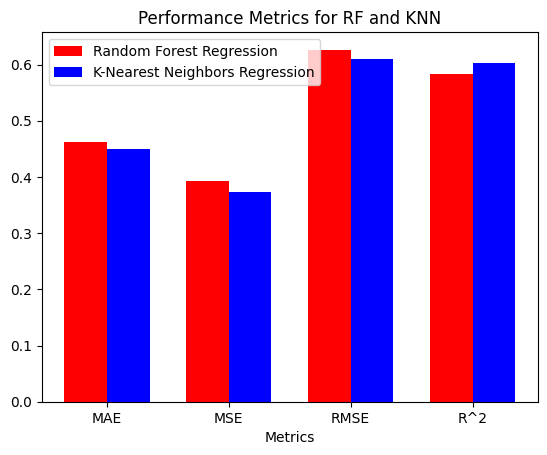

In [19]:
N = 4
ind = np.arange(N)
width = 0.35

rf_metrics = [rf_mae, rf_mse, rf_rmse, rf_r2]
kn_metrics = [knn_mae, knn_mse, knn_rmse, knn_r2]

fig, ax = plt.subplots()
rects1 = ax.bar(ind, rf_metrics, width, label='Random Forest Regression', color='r')
rects2 = ax.bar(ind + width, kn_metrics, width, label='K-Nearest Neighbors Regression', color='b')

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics for RF and KNN')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['MAE', 'MSE', 'RMSE', 'R^2'])
ax.legend()

plt.show()

In [20]:
data = {'model': ['Random Forest Regression', 'K-Nearest Neighbors Regression'],
        'MAE': [rf_mae, knn_mae],
        'MSE': [rf_mse, knn_mse],
        'RMSE': [rf_rmse, knn_rmse],
        'R^2': [rf_r2, knn_r2]}

perfomance = pd.DataFrame(data)
perfomance

,model,MAE,MSE,RMSE,R^2
0,Random Forest Regression,0.461476,0.392395,0.626414,0.582902
1,K-Nearest Neighbors Regression,0.450364,0.372899,0.610654,0.603626
